## Dealing with Stationarity via Statistical Tool and Visualization

In [1]:
# This code imports the data you generated before for replicating.
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm


stock_prices = pd.read_csv('stock_prices.csv')
stock_prices = stock_prices.set_index('timestamp')

Let me apply statistical tool to confirm that both data have trend component. Augmented Dickey Fuller (adf) is most commonly used test to check the stationary.

In [2]:
from statsmodels.tsa.stattools import adfuller

The statistical way of detecting non-stationarity is more reliable and ADF test is widely appreciated test.

Let us check if the data is stationary using statistical tool known as `Augmented Dickey Fuller (ADF)`. The hypothesis of this test is:

$$H_0 = \text{There is a unit root}$$
$$H_A = \text{There is no unit root}$$

Please see [this explanation](https://en.wikipedia.org/wiki/Unit_root) for the relationship between unit root and stationarity.

According to this test result, the p-value of 0.67 suggests that there is non-stationarity in the data as it is higher than 0.05 in the case you have a confidence interval of 95% (corresponding 5% significance level). Now, you need to deal with this non-stationarity before moving forward.

In [3]:
stat_test=adfuller(stock_prices['T'])[0:2]
print(f'The test statistic and p-value for AT&T are {stat_test}')

The test statistic and p-value for AT&T are (-1.1856243786134169, 0.6797489695872558)


In [4]:
stat_test=adfuller(stock_prices['VZ'])[0:2]
print(f'The test statistic and p-value for VZ are {stat_test}')

The test statistic and p-value for VZ are (-3.114513580391114, 0.02549759690348691)


Well, looking at p-value, which are 0.6797 for AT&T and 0.0254 for Verizon, it can be readily concluded that the data is not stationary as we accept the null hypothesis stating that there is a unit root.

All right, let's deal with this simply by taking the difference. Taking difference makes, most of the time, the data stationary.

In [5]:
diff_VZ = stock_prices['VZ'].diff().dropna()
diff_T = stock_prices['T'].diff().dropna()

In [6]:
stat_test=adfuller(diff_T)[0:2]
print(f'The test statistic and p-value for AT&T are {stat_test}')

The test statistic and p-value for AT&T are (-6.629083586827914, 5.775849021851074e-09)


In [7]:
stat_test=adfuller(diff_VZ)[0:2]
print(f'The test statistic and p-value for VZ are {stat_test}')

The test statistic and p-value for VZ are (-6.520162155970795, 1.0470237769206731e-08)


And, it did! Now, now we have stationary data and now let me visualize and see what it looks like. I will utilize line plot as well as ACF.

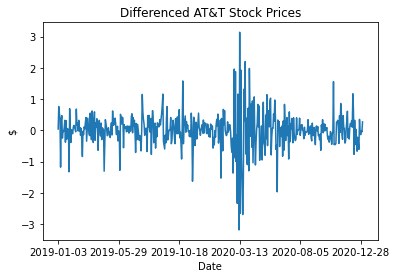

In [8]:
diff_T.plot()
plt.title('Differenced AT&T Stock Prices')
plt.ylabel('$')
plt.xlabel('Date')
plt.show()

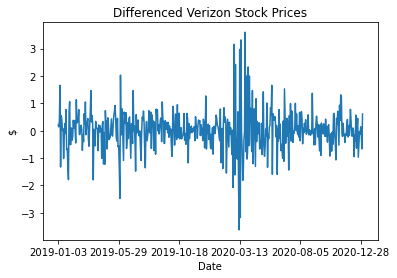

In [9]:
diff_VZ.plot()
plt.title('Differenced Verizon Stock Prices')
plt.ylabel('$')
plt.xlabel('Date')
plt.show()

Both the differenced stock prices of AT&T and Verizon seems to fluctuate around zero, which is something that I expect when data becomes stationary.

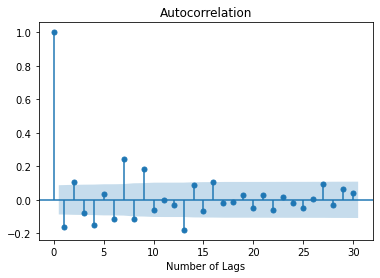

In [10]:
sm.graphics.tsa.plot_acf(diff_T,lags=30)
plt.xlabel('Number of Lags')
plt.show()

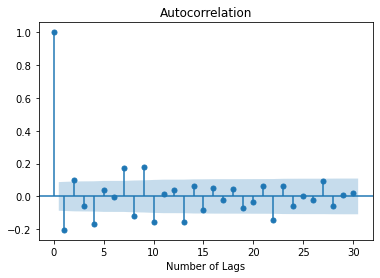

In [11]:
sm.graphics.tsa.plot_acf(diff_VZ,lags=30)
plt.xlabel('Number of Lags')
plt.show()

Likewise, ACF plot exhibits a very fast decay and stays within the confidence interval band aside from some observations. These observations can be used for identifying the optimal number of lag in modeling. This is the topic of the next milestone.

Well, as `diff_T` and `diff_VZ` are stationary, these data will be utilized during time series modeling.